In [60]:
# IMDB & LSMTM & CNN
# *Dataset에 대해 추가 조사 필요
# - 실제 데이터에 대한 상세 기술
# - 예측하고자 하는 방법/방향 기술 : LSTM과 CNN을 합친 모델로 학습하여 얻게된 accuracy를 예측하고자 한다.
# - 학습을 위해 데이터가 어떻게 가공/처리되었는지 기술 -> 앞 문서들에서 언급됨.
# - 사용된 모델의 특징에 대한 기술 -> 앞 문서들에서 언급됨.
# - 생성된 모델의 model.summary() 출력
# - epoch은 최소 25회 이상 진행

In [66]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Dropout, Embedding, Activation, LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.preprocessing import sequence

In [67]:
MAX_features = 5000
MAX_len = 400
Batch_size = 30
Embedding_dimension = 128
Filters = 150
Pool_size = 4
Kernel_size = 5
Hidden_dimension = 250
Epoch = 25

In [68]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_features)

In [77]:
x_train = sequence.pad_sequences(x_train, maxlen=MAX_len)
x_test = sequence.pad_sequences(x_test, maxlen=MAX_len)
print(x_train[0])
print(y_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4 

In [70]:
model = Sequential()
model.add(Embedding(MAX_features, Embedding_dimension, input_length=MAX_len))
model.add(Dropout(0.25))
model.add(Conv1D(Filters,
                 Kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(MaxPooling1D(pool_size=Pool_size))
model.add(LSTM(70))
model.add(Dense(1, activation='sigmoid'))

W0803 13:29:22.280443  5440 deprecation_wrapper.py:119] From C:\Users\ehddn\.conda\envs\venv\lib\site-packages\keras-2.2.4-py3.7.egg\keras\backend\tensorflow_backend.py:4255: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [71]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [72]:
history = model.fit(x_train, y_train,
          batch_size=Batch_size,
          epochs=Epoch,
          validation_data=(x_test, y_test))
score, acc = model.evaluate(x_test, y_test, batch_size=Batch_size)
print('Test score :', score)
print('Test accuracy :', acc)
model.summary()
scores = model.evaluate(x_test, y_test, verbose=0)
print("Accuracy : %.2f%%" % (scores[1]*100))
history_dict = history.history
history_dict.keys()

Train on 25000 samples, validate on 25000 samples
Epoch 1/25
25000/25000 [==============================] - 183s 7ms/step - loss: 0.3567 - acc: 0.8399 - val_loss: 0.2616 - val_acc: 0.8926
Epoch 2/25
25000/25000 [==============================] - 171s 7ms/step - loss: 0.2175 - acc: 0.9160 - val_loss: 0.2613 - val_acc: 0.8930 a
Epoch 3/25
25000/25000 [==============================] - 181s 7ms/step - loss: 0.1553 - acc: 0.9422 - val_loss: 0.2946 - val_acc: 0.8891
Epoch 4/25
25000/25000 [==============================] - 182s 7ms/step - loss: 0.1048 - acc: 0.9636 - val_loss: 0.3661 - val_acc: 0.8777
Epoch 5/25
25000/25000 [==============================] - 179s 7ms/step - loss: 0.0698 - acc: 0.9762 - val_loss: 0.3889 - val_acc: 0.8798
Epoch 6/25
25000/25000 [==============================] - 181s 7ms/step - loss: 0.0491 - acc: 0.9843 - val_loss: 0.4424 - val_acc: 0.8787
Epoch 7/25
25000/25000 [==============================] - 189s 8ms/step - loss: 0.0433 - acc: 0.9860 - val_loss: 0.4959 

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

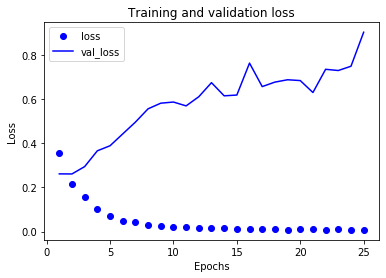

In [76]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='loss')
plt.plot(epochs, val_loss, 'b', label='val_loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()